In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp

%matplotlib inline

In [4]:
df = pd.read_csv('./#1EDA/amazon_data/amazon.csv')
pd.set_option('display.max_columns', None)

In [8]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [26]:
df['discounted_price'] = df['discounted_price'].astype('str').str.replace('₹', '')
df['discounted_price'] = df['discounted_price'].astype('str').str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].astype('str').str.replace('₹', '')
df['actual_price'] = df['actual_price'].astype('str').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype('float64')

df['discount_percentage'] = df['discount_percentage'].astype('str').str.replace('%', '').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].astype('str').str.replace(',', '.')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

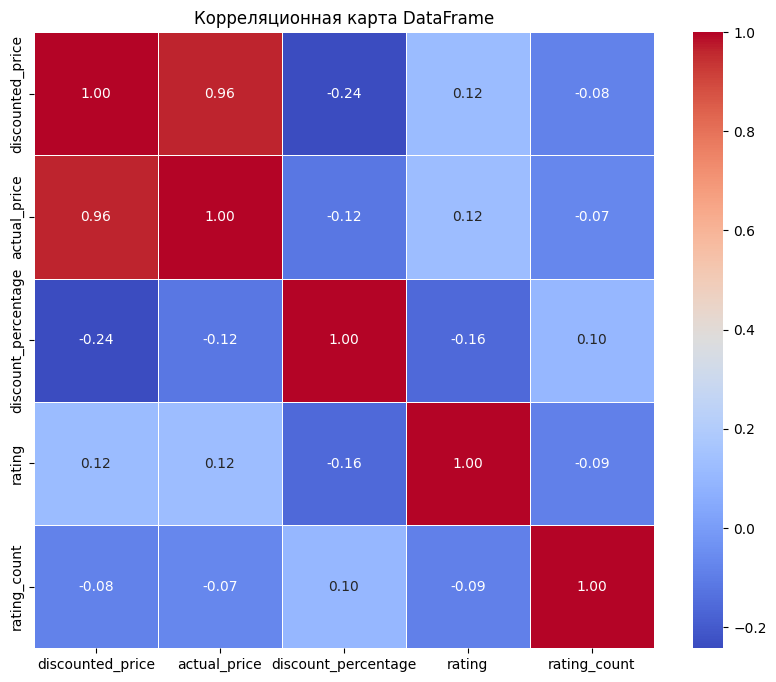

In [28]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8)) # Установка размера графика для лучшей читаемости

sns.heatmap(
    correlation_matrix,
    annot=True,     # Показывать числовые значения корреляции на карте
    cmap='coolwarm',  # Цветовая схема ('coolwarm' - популярна для корреляции)
    fmt=".2f",      # Формат чисел (два знака после запятой)
    linewidths=.5,  # Добавить небольшие линии между ячейками
    cbar=True       # Отобразить цветовую шкалу
)

plt.title('Корреляционная карта DataFrame') # Добавление заголовка
plt.show() # Фактически показать график

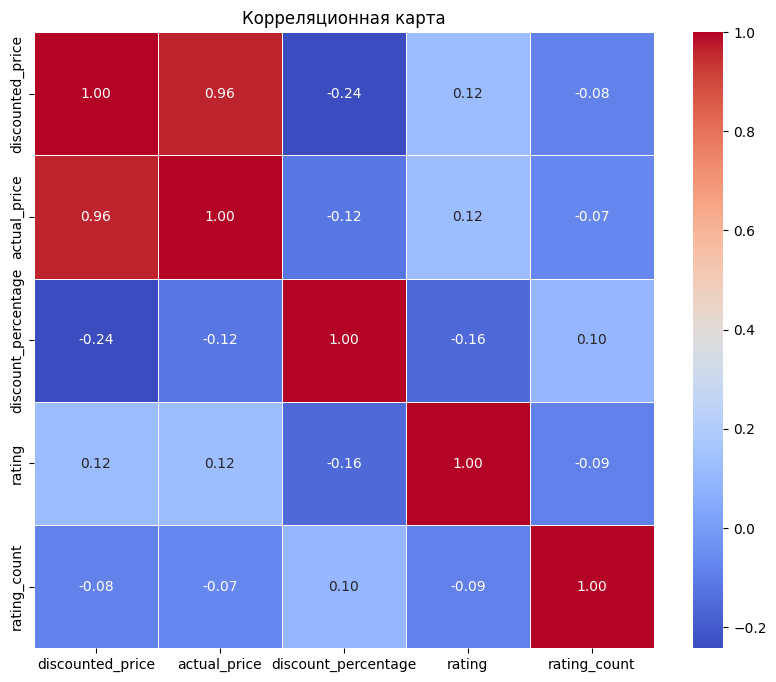

In [29]:
plt.figure(figsize=(10, 8)) # Настройка размера графика
sns.heatmap(correlation_matrix,
            annot=True, # Показывает значения корреляции на карте
            cmap='coolwarm', # Цветовая схема
            fmt=".2f", # Формат отображения чисел
            linewidths=.5, # Толщина линий между ячейками
            cbar=True) # Добавляет цветовую шкалу

plt.title('Корреляционная карта')
plt.show()